In [1]:
from segment_anything import SamPredictor, sam_model_registry
from segment_anything import SamAutomaticMaskGenerator
import cv2

import matplotlib.pyplot as plt

import torch

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-qmmbjjcl because the default path (/home/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
image = cv2.imread('/datasets/pexels-kitchen.jpg')
h, w, _ = image.shape
image = cv2.resize(image, dsize=[320, int(h/w*320)])
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
# sam = sam_model_registry["vit_b"](checkpoint="/datasets/sam_vit_b_01ec64.pth").to(device)
sam = sam_model_registry["vit_b"](checkpoint="/datasets/sam_vit_b_01ec64.pth")

In [5]:
# predictor = SamPredictor(sam)
# input_prompts =
# masks, _, _ = predictor.predict(<input_prompts>)

In [6]:
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(rgb_image)

In [7]:
masks

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 835,
  'bbox': [99, 192, 41, 20],
  'predicted_iou': 1.0136505365371704,
  'point_coords': [[105.0, 209.671875]],
  'stability_score': 0.9976047873497009,
  'crop_box': [0, 0, 320, 213]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 391,
  'bbox': [101, 118, 14, 32

In [26]:
import numpy as np
def gen_colors(n_colors):
    colors = [(np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for _ in range(n_colors)]
    return np.array(colors, dtype='uint8')

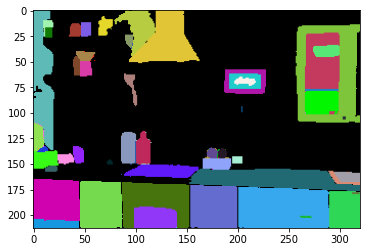

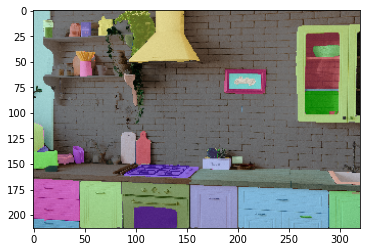

In [35]:
alpha = 0.5

rand_colors = gen_colors( len(masks) )

colored_masks = np.zeros_like(rgb_image, dtype='uint8')
for i, mask in enumerate(masks):
    colored_masks = colored_masks + np.expand_dims(mask['segmentation'], axis=-1) * rand_colors[i]

plt.imshow(colored_masks)
plt.show()


image_mask_overlap = cv2.addWeighted(rgb_image, alpha, colored_masks, beta=1-alpha, gamma=0)
# image_mask_overlap = (colored_masks*alpha + (1 - alpha)*rgb_image).astype('uint8')


plt.imshow(image_mask_overlap)
plt.show()